In [ ]:
import pandas as pd
df=pd.read_csv("TCS (1).csv")

In [ ]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2004-08-25,TCS,EQ,850.00,1198.7,1198.7,979.00,985.00,987.95,1008.32,17116372,1.725876e+15,NaN,5206360,0.3042
1,2004-08-26,TCS,EQ,987.95,992.0,997.0,975.30,976.85,979.00,985.65,5055400,4.982865e+14,NaN,1294899,0.2561
2,2004-08-27,TCS,EQ,979.00,982.4,982.4,958.55,961.20,962.65,969.94,3830750,3.715586e+14,NaN,976527,0.2549
3,2004-08-30,TCS,EQ,962.65,969.9,990.0,965.00,986.40,986.75,982.65,3058151,3.005106e+14,NaN,701664,0.2294
4,2004-08-31,TCS,EQ,986.75,986.5,990.0,976.00,987.80,988.10,982.18,2649332,2.602133e+14,NaN,695234,0.2624


In [ ]:
df.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
4134,2021-04-26,TCS,EQ,3109.50,3102.05,3153.00,3088.05,3100.05,3100.80,3122.35,2490260,7.775465e+14,87012.0,1345353,0.5402
4135,2021-04-27,TCS,EQ,3100.80,3106.00,3136.10,3103.00,3132.75,3132.00,3122.18,1471417,4.594036e+14,97077.0,849767,0.5775
4136,2021-04-28,TCS,EQ,3132.00,3149.95,3151.00,3112.00,3123.00,3124.10,3125.72,1639037,5.123176e+14,76017.0,847762,0.5172
4137,2021-04-29,TCS,EQ,3124.10,3145.60,3157.35,3105.50,3114.45,3115.25,3130.83,1621395,5.076306e+14,98275.0,837567,0.5166
4138,2021-04-30,TCS,EQ,3115.25,3099.00,3132.05,3020.00,3040.00,3035.65,3063.19,3072305,9.411057e+14,157829.0,1942473,0.6323


In [ ]:
df1=df.reset_index()['Close']

In [ ]:
df1

0        987.95
1        979.00
2        962.65
3        986.75
4        988.10
         ...   
4134    3100.80
4135    3132.00
4136    3124.10
4137    3115.25
4138    3035.65
Name: Close, Length: 4139, dtype: float64

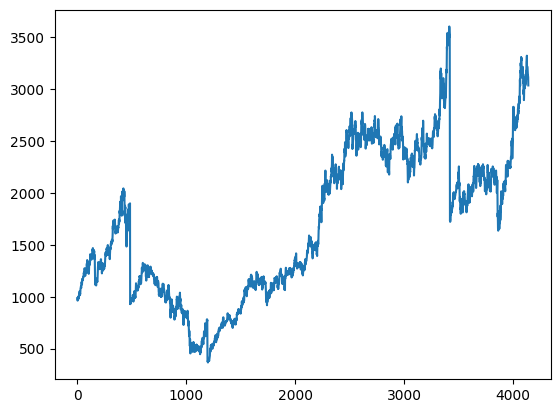

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
import numpy as np
df1

0        987.95
1        979.00
2        962.65
3        986.75
4        988.10
         ...   
4134    3100.80
4135    3132.00
4136    3124.10
4137    3115.25
4138    3035.65
Name: Close, Length: 4139, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
print(df1)

[[0.19193401]
 [0.18916915]
 [0.18411826]
 ...
 [0.85184041]
 [0.84910644]
 [0.82451615]]


In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.85)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(3518, 621)

In [ ]:
train_data

array([[0.19193401],
       [0.18916915],
       [0.18411826],
       ...,
       [0.45627964],
       [0.45777792],
       [0.45916807]])

In [ ]:
test_data

array([[0.44251711],
       [0.46472869],
       [0.47208106],
       [0.48547288],
       [0.48473147],
       [0.47784248],
       [0.47086081],
       [0.48378925],
       [0.48670858],
       [0.47652956],
       [0.47827497],
       [0.48448433],
       [0.4677098 ],
       [0.4653002 ],
       [0.46954789],
       [0.47444432],
       [0.46696838],
       [0.44650222],
       [0.44667212],
       [0.4570365 ],
       [0.47067546],
       [0.49960612],
       [0.49239277],
       [0.49477147],
       [0.49914274],
       [0.5079316 ],
       [0.50666502],
       [0.50232465],
       [0.50309696],
       [0.49710384],
       [0.50457979],
       [0.5097697 ],
       [0.49920452],
       [0.50141332],
       [0.50281892],
       [0.50082637],
       [0.49483326],
       [0.49038476],
       [0.47238998],
       [0.47940254],
       [0.47035109],
       [0.47645233],
       [0.47246722],
       [0.47154045],
       [0.47455245],
       [0.48088537],
       [0.47367202],
       [0.466

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(3417, 100)
(3417,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(520, 100)
(520,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

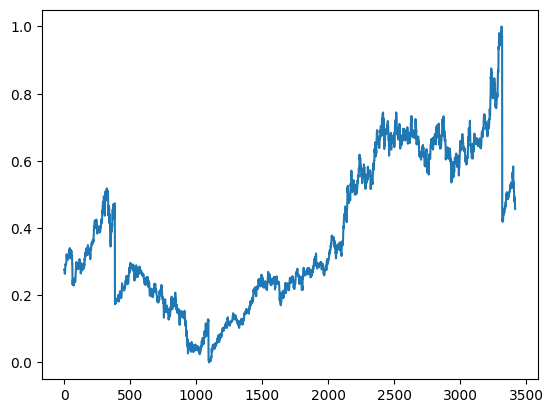

In [ ]:
plt.plot(y_train)   #trainingset

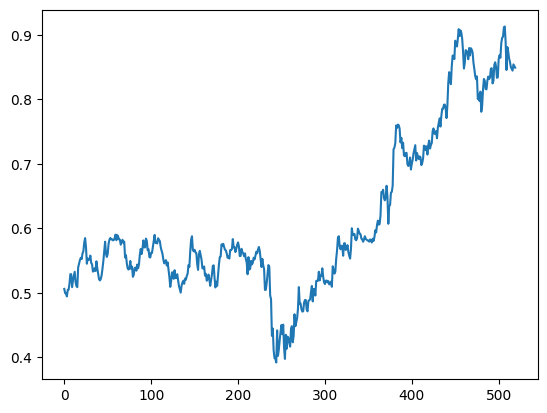

In [ ]:
plt.plot(ytest)    #testingset

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=5,batch_size=64,verbose=1)

Epoch 1/5
54/54 [==============================] - 32s 446ms/step - loss: 0.0173 - accuracy: 5.8531e-04 - val_loss: 0.0017 - val_accuracy: 0.0000e+00
Epoch 2/5
54/54 [==============================] - 11s 195ms/step - loss: 0.0017 - accuracy: 5.8531e-04 - val_loss: 0.0014 - val_accuracy: 0.0000e+00
Epoch 3/5
54/54 [==============================] - 12s 212ms/step - loss: 0.0015 - accuracy: 5.8531e-04 - val_loss: 0.0012 - val_accuracy: 0.0000e+00
Epoch 4/5
54/54 [==============================] - 11s 211ms/step - loss: 0.0015 - accuracy: 5.8531e-04 - val_loss: 0.0016 - val_accuracy: 0.0000e+00
Epoch 5/5
54/54 [==============================] - 11s 211ms/step - loss: 0.0014 - accuracy: 5.8531e-04 - val_loss: 0.0013 - val_accuracy: 0.0000e+00


In [ ]:
model.save("keras.h5")

In [ ]:
from keras.models import load_model

model = load_model('keras.h5')
scores = model.evaluate(X_test, ytest)

LSTM_accuracy = scores[1]*100

print('Test accuracy: ', scores[1]*100, '%')

17/17 [==============================] - 2s 38ms/step - loss: 0.0013 - accuracy: 0.0000e+00
Test accuracy:  0.0 %


In [ ]:
import tensorflow as tf

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

17/17 [==============================] - 1s 36ms/step


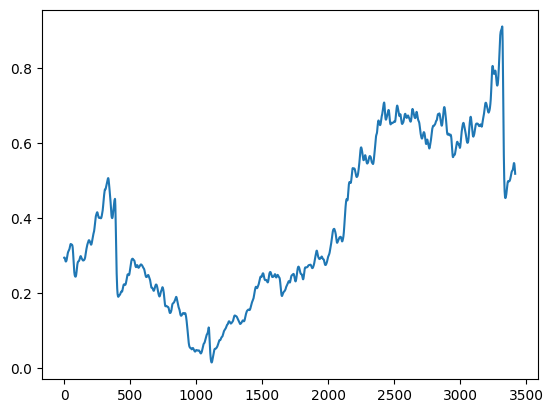

In [ ]:
plt.plot(train_predict)

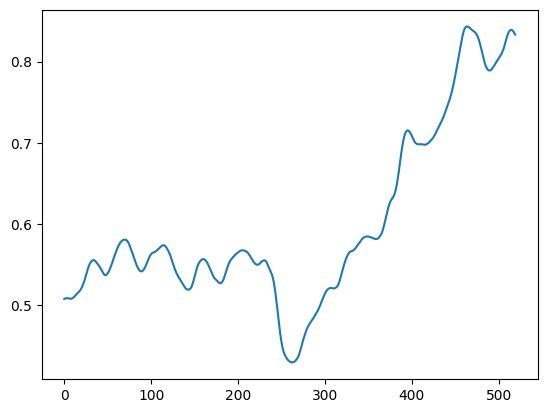

In [ ]:
plt.plot(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
c=math.sqrt(mean_squared_error(y_train,train_predict))

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_train, train_predict)

126087519568.09456

In [ ]:
### Test Data RMSE
d=math.sqrt(mean_squared_error(ytest,test_predict))
print(d)

0.03588317354591854


In [ ]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

In [ ]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

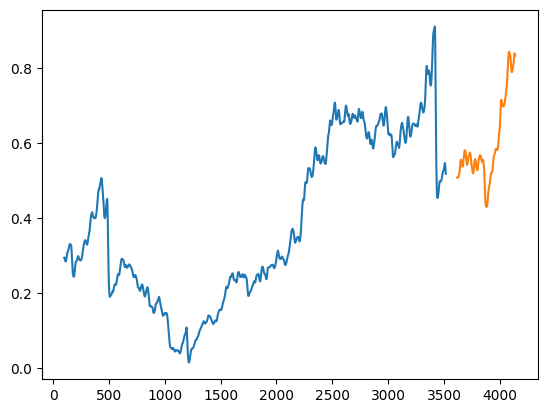

In [ ]:
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
df5 = pd.DataFrame({'Actual': ytest.flatten(), 'Predicted' : test_predict.flatten()})
print(df5)

       Actual  Predicted
0    0.506325   0.507489
1    0.499714   0.508029
2    0.499220   0.508404
3    0.494663   0.508569
4    0.504672   0.508471
..        ...        ...
515  0.847330   0.839054
516  0.844642   0.838291
517  0.854281   0.836922
518  0.851840   0.835197
519  0.849106   0.833263

[520 rows x 2 columns]


In [ ]:
df6 = pd.DataFrame({'Actual': y_train.flatten(), 'Predicted' : train_predict.flatten()})
print(df6)

        Actual  Predicted
0     0.276981   0.293898
1     0.277166   0.294244
2     0.274556   0.294178
3     0.270941   0.293718
4     0.263820   0.292880
...        ...        ...
3412  0.482770   0.536472
3413  0.477765   0.532297
3414  0.474614   0.527714
3415  0.456280   0.522854
3416  0.457778   0.517667

[3417 rows x 2 columns]


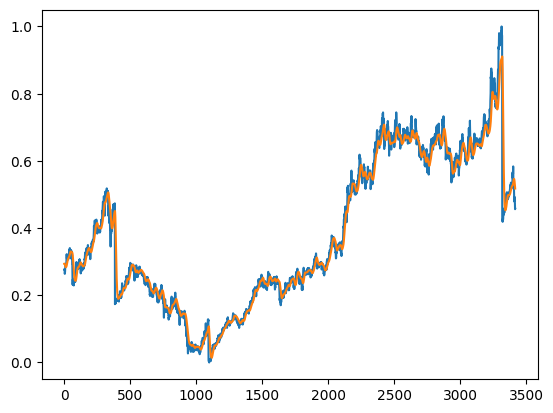

In [ ]:
plt.plot(df6)

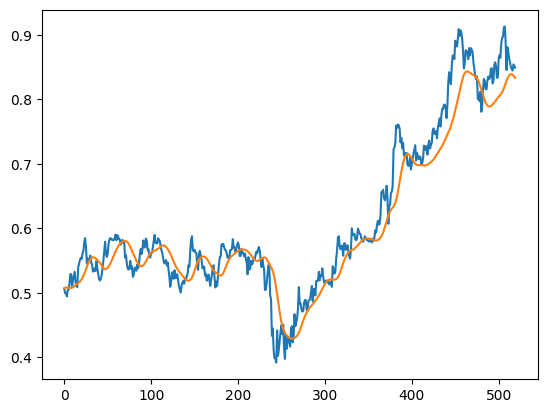

In [ ]:
plt.plot(df5)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df5)
unscaled = scaler.inverse_transform(df5)

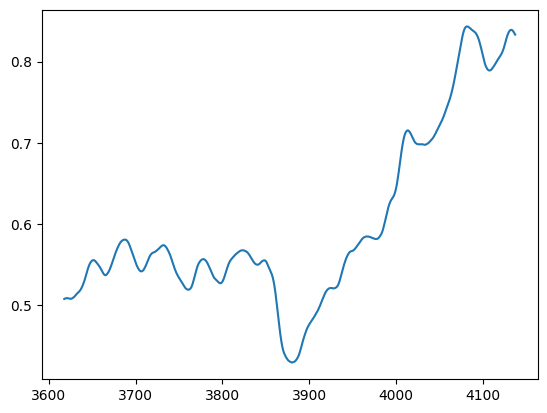

In [ ]:
plt.plot(testPredictPlot)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

In [ ]:
len(test_data)

621

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df1)
unscaled = scaler.inverse_transform(df1)

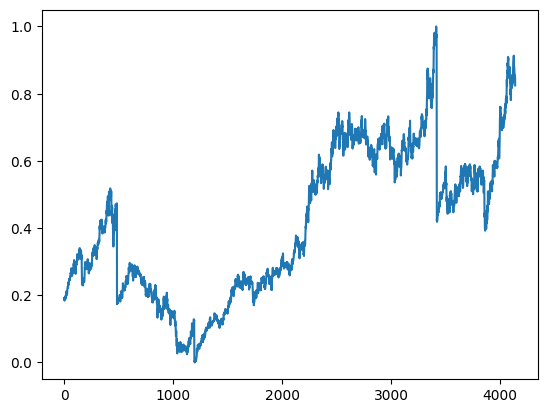

In [ ]:
plt.plot(scaled)

In [ ]:
x_input=test_data[521:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.7237453854589828,
 0.7293368962481273,
 0.7324724672155203,
 0.7508842927974546,
 0.7550547566457115,
 0.7468682905732071,
 0.7466520442995939,
 0.751007862096662,
 0.7398402866807743,
 0.7561050956889761,
 0.7635192536414328,
 0.7705627036962668,
 0.7579431890146895,
 0.7741153210484855,
 0.7853137887891755,
 0.7854991427379867,
 0.7916930538607683,
 0.7920328694335892,
 0.7854836965755858,
 0.7711033193803001,
 0.7913377921255464,
 0.8256900573052626,
 0.8422328972366817,
 0.8294125824438918,
 0.8236357177059361,
 0.8508518558564127,
 0.8680125422838696,
 0.8675182650870392,
 0.8626063854435366,
 0.8909500934492827,
 0.8855902750961524,
 0.8820067654191317,
 0.894039325929473,
 0.9088985341591884,
 0.8981016666409232,
 0.9071376716454798,
 0.9034923773188552,
 0.8941474490662797,
 0.8742218995690523,
 0.8479016388378309,
 0.8565514897823636,
 0.8763534699803834,
 0.8753031309371189,
 0.8717196212600979,
 0.8622974621955175,
 0.8796435025717861,
 0.8681515577454781,
 0.879396363973

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.8288836]
101
1 day input [0.7293369  0.73247247 0.75088429 0.75505476 0.74686829 0.74665204
 0.75100786 0.73984029 0.7561051  0.76351925 0.7705627  0.75794319
 0.77411532 0.78531379 0.78549914 0.79169305 0.79203287 0.7854837
 0.77110332 0.79133779 0.82569006 0.8422329  0.82941258 0.82363572
 0.85085186 0.86801254 0.86751827 0.86260639 0.89095009 0.88559028
 0.88200677 0.89403933 0.90889853 0.89810167 0.90713767 0.90349238
 0.89414745 0.8742219  0.84790164 0.85655149 0.87635347 0.87530313
 0.87171962 0.86229746 0.8796435  0.86815156 0.87939636 0.87714122
 0.87244559 0.85670595 0.84711388 0.83608532 0.83121978 0.83569917
 0.80066727 0.80738635 0.79746992 0.8120511  0.78084985 0.79008665
 0.8154647  0.8317604  0.82885652 0.81598987 0.81565005 0.82924267
 0.83542114 0.83140514 0.83393831 0.84750004 0.84839592 0.82477873
 0.82901098 0.85355493 0.85755549 0.85091364 0.83353671 0.83413911
 0.86248282 0.86844503 0.86447537 0.8873048  0.89527502 0.8973448
 0.91153983 0.91305355 0.88966806 0.

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt
len(df1)

4139

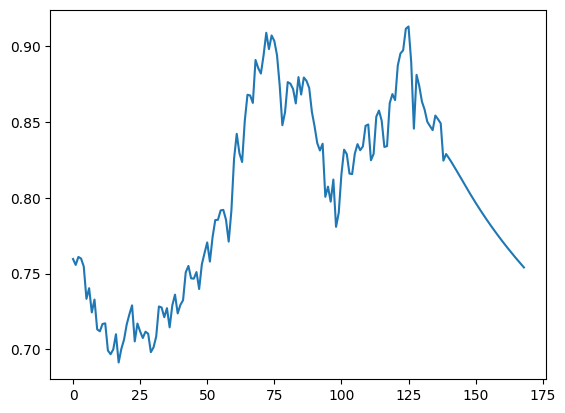

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[4000:])

In [ ]:
p=scaler.inverse_transform(df5)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
x_std = scaler.fit_transform(df1)

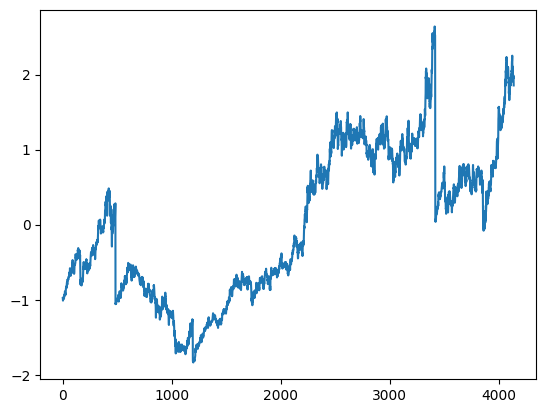

In [ ]:
plt.plot(x_std)

In [ ]:
x_stdd=scaler.fit_transform(x_std)

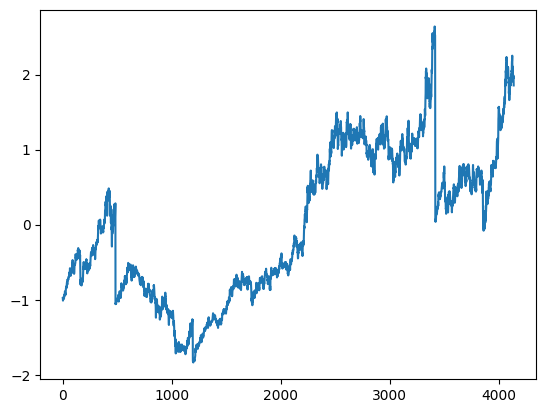

In [ ]:
plt.plot(x_stdd)

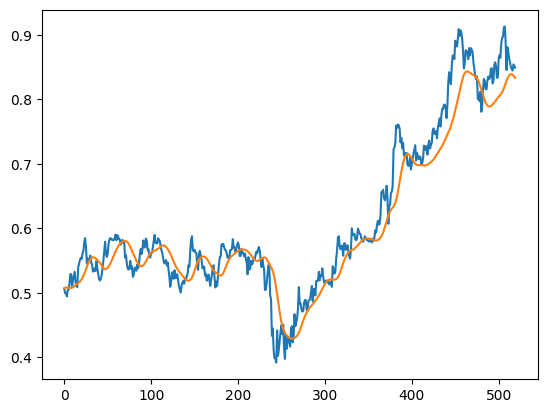

In [ ]:
plt.plot(df5)